In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Statistical Learning II/Laboratorio5/Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [55]:
df.shape

(7050, 16)

### Imputación de Datos.

In [56]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [57]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [58]:
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [59]:
df.dropna(axis=0, inplace=True)
df.shape

(7050, 12)

In [60]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [ ]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [ ]:
# No se elimina la columna de Status_id

### Realice un análisis estadístico de cada variable dentro del dataset Live.csv

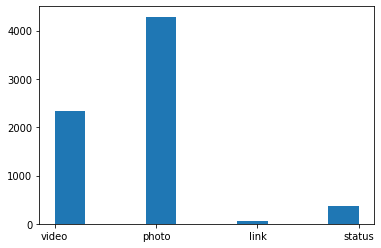

In [37]:
plt.hist(df['status_type'])
plt.show()

In [41]:
df['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

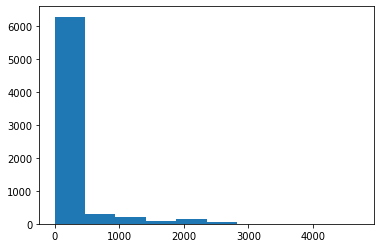

In [42]:
plt.hist(df['num_reactions'])
plt.show()

In [44]:
df['num_reactions'].value_counts()

1       131
2       124
14      121
0       121
3       116
       ... 
2826      1
2032      1
2154      1
1997      1
415       1
Name: num_reactions, Length: 1067, dtype: int64

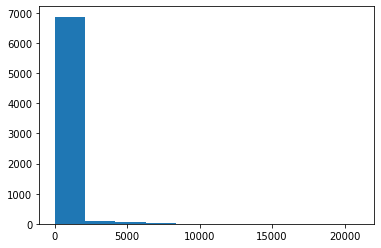

In [45]:
plt.hist(df['num_comments'])
plt.show()

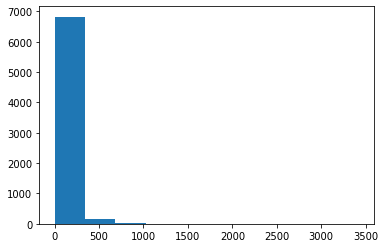

In [46]:
plt.hist(df['num_shares'])
plt.show()

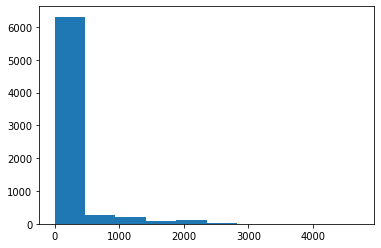

In [47]:
plt.hist(df['num_likes'])
plt.show()

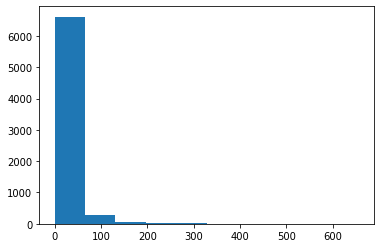

In [48]:
plt.hist(df['num_loves'])
plt.show()

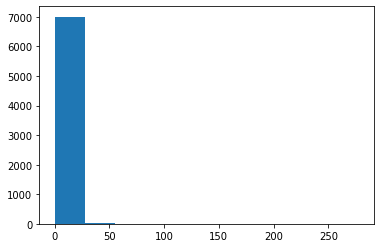

In [49]:
plt.hist(df['num_wows'])
plt.show()

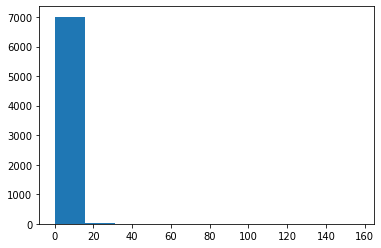

In [50]:
plt.hist(df['num_hahas'])
plt.show()

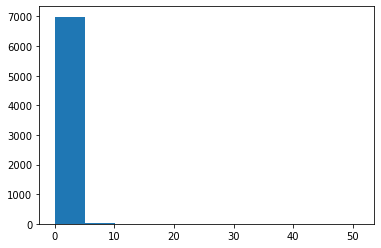

In [51]:
plt.hist(df['num_sads'])
plt.show()

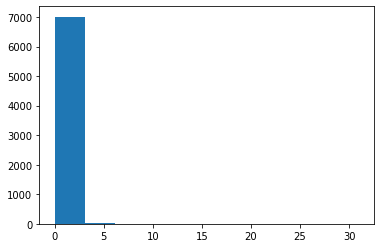

In [52]:
plt.hist(df['num_angrys'])
plt.show()

### Muestre una gráfica de serie temporal para cada tipo de entidad:

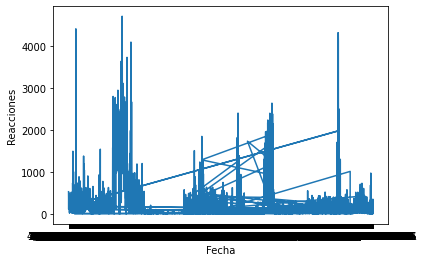

In [28]:
plt.plot(df['status_published'], df['num_reactions'])
plt.xlabel("Fecha")
plt.ylabel("Reacciones")
plt.show()

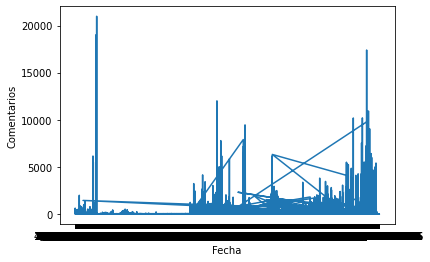

In [29]:
plt.plot(df['status_published'], df['num_comments'])
plt.xlabel("Fecha")
plt.ylabel("Comentarios")
plt.show()

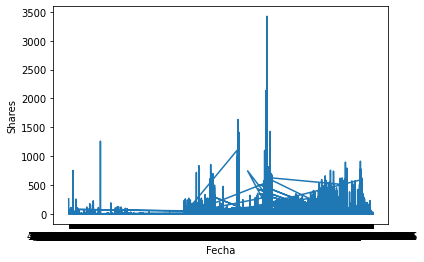

In [30]:
plt.plot(df['status_published'], df['num_shares'])
plt.xlabel("Fecha")
plt.ylabel("Shares")
plt.show()

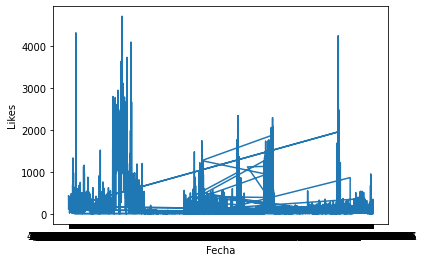

In [31]:
plt.plot(df['status_published'], df['num_likes'])
plt.xlabel("Fecha")
plt.ylabel("Likes")
plt.show()

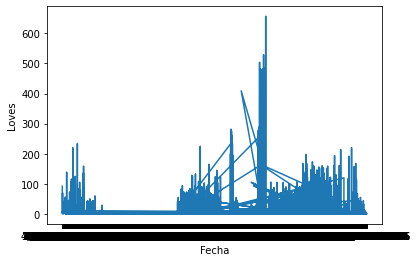

In [32]:
plt.plot(df['status_published'], df['num_loves'])
plt.xlabel("Fecha")
plt.ylabel("Loves")
plt.show()

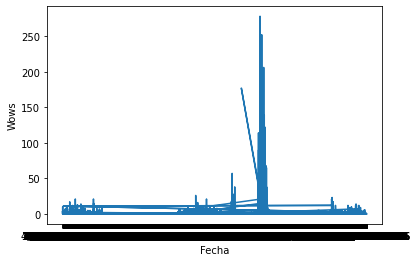

In [33]:
plt.plot(df['status_published'], df['num_wows'])
plt.xlabel("Fecha")
plt.ylabel("Wows")
plt.show()

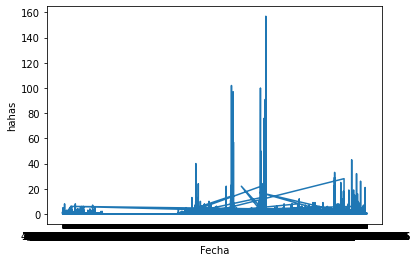

In [34]:
plt.plot(df['status_published'], df['num_hahas'])
plt.xlabel("Fecha")
plt.ylabel("hahas")
plt.show()

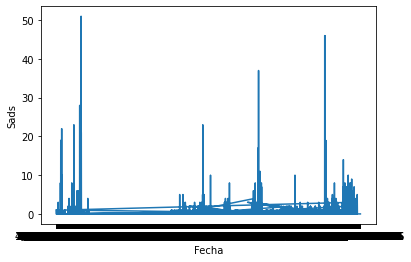

In [36]:
plt.plot(df['status_published'], df['num_sads'])
plt.xlabel("Fecha")
plt.ylabel("Sads")
plt.show()

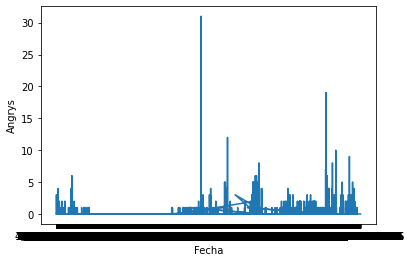

In [61]:
plt.plot(df['status_published'], df['num_angrys'])
plt.xlabel("Fecha")
plt.ylabel("Angrys")
plt.show()

In [53]:
df.shape

(7050, 11)

In [64]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


### Estandarización de Variables

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(status_type.values)
scaled_features

In [ ]:
Ks = range(1, 11)
variabilidad = []

for k in Ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_features)
    variabilidad.append(model.inertia_)

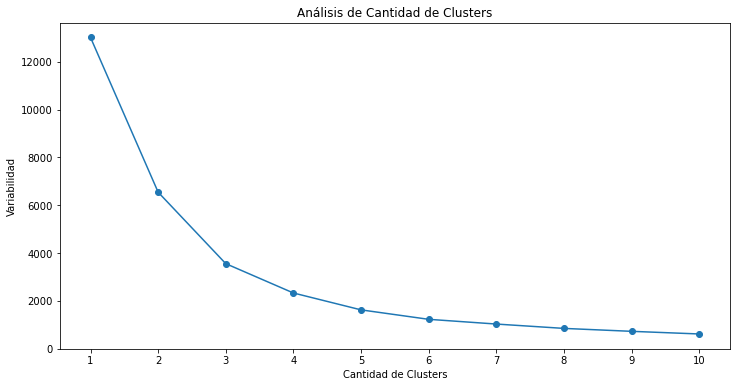

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(Ks, variabilidad, '-o')
plt.title("Análisis de Cantidad de Clusters")
plt.xlabel("Cantidad de Clusters")
plt.ylabel("Variabilidad")
plt.xticks(Ks)
plt.show()

### Modelo KMeans con K = 3

In [ ]:
MODEL = KMeans(n_clusters=3)
MODEL.fit(scaled_features)

KMeans(n_clusters=3)

In [ ]:
customer_df['Cluster'] = MODEL.predict(scaled_features)
customer_df.head()

,Mean,Sum,Max,Cluster
CustomerID,,,,
12347,23.681319,4310.00,249.6,0
12348,57.975484,1797.24,240.0,0
12349,24.076027,1757.55,300.0,0
12350,19.670588,334.40,40.0,0
12352,29.482824,2506.04,376.5,0


In [ ]:
fig = px.scatter_3d(data_frame=customer_df, x='Max', y='Mean', z='Sum', color='Cluster')

In [ ]:
fig.show()